Compare the different runs that we have

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from moSlicer import MoSlicer
import moMetrics as MoMetrics
from moSummaryMetrics import ValueAtHMetric
import moPlots as moPlots
import moMetricBundle as mmb
import lsst.sims.maf.plots as plots
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db


In [2]:
nObsPerNight=2

In [3]:
runs = ['enigma_1189', 'ops2_1094', 'enigma_1257', 'enigma_1258', 'enigma_1259']
colorDict = {'enigma_1189':'k', 'ops2_1094':'r', 'enigma_1257':'g', 'enigma_1258':'b', 'enigma_1259':'y'}
labelDict = {'enigma_1189':'baseline', 'ops2_1094':'no pairs', 'enigma_1257':'pairs', 
             'enigma_1258':'triples', 'enigma_1259':'quads'}
orbitfile = 'pha20141031.des'
metadata = 'PHAS with camera footprint'
outDir = '5runs'
completeList = []
intCompletenessList = []
for runName in runs:
    obsfile = runName+'_out.txt'
    mos = MoSlicer(orbitfile, Hrange=np.arange(13, 26, 0.5))
    mos.readObs(obsfile)
    metric = MoMetrics.DiscoveryChancesMetric(nObsPerNight=nObsPerNight)
    slicer = mos
    plotDict = {'label':labelDict[runName], 'color':colorDict[runName]}
    pandasConstraint = None
    discovery = mmb.MoMetricBundle(metric, slicer, pandasConstraint,
                                   runName=runName, metadata=metadata,
                                  plotDict=plotDict)

    bg = mmb.MoMetricBundleGroup({0:discovery}, outDir=outDir)
    bg.runAll()
    #bg.plotAll(closefigs=False)
    completeness = discovery.reduceMetric(discovery.metric.reduceFuncs['Completeness'])
    completeList.append(completeness)
    completenessInt = completeness.reduceMetric(completeness.metric.reduceFuncs['CumulativeH'])
    intCompletenessList.append(completenessInt)

Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.


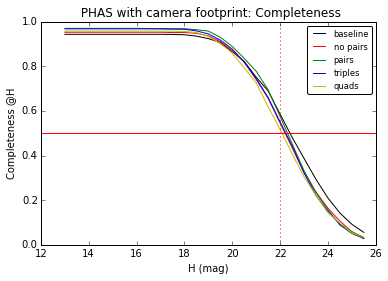

In [4]:
ph = plots.PlotHandler(outDir=outDir)
ph.setMetricBundles(completeList)
ph.plot(plotFunc=moPlots.MetricVsH())
plt.axvline(22.0, color='r', linestyle=':')
plt.axhline(0.5, color='r', linestyle='-')

1

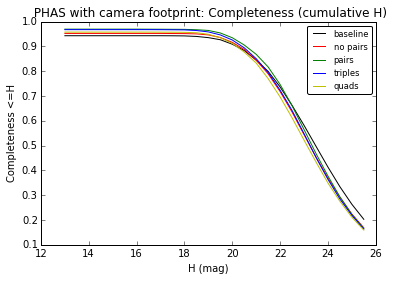

In [5]:
ph = plots.PlotHandler(outDir=outDir)
ph.setMetricBundles(intCompletenessList)
ph.plot(plotFunc=moPlots.MetricVsH())

Wow, so if we only need 2 obsPerNight, there's pretty minimal difference between all the runs. Try it again but require 3 observaions per night to get a tracklet.

Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.


2

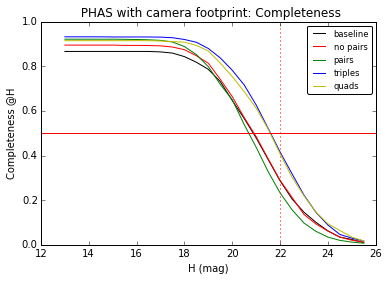

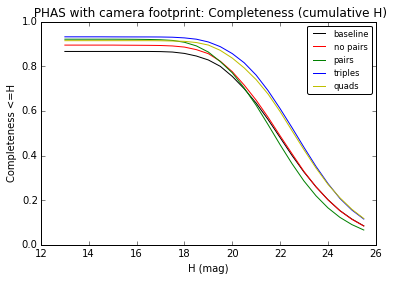

In [6]:
nObsPerNight=3
completeList = []
intCompletenessList = []
for runName in runs:
    obsfile = runName+'_out.txt'
    mos = MoSlicer(orbitfile, Hrange=np.arange(13, 26, 0.5))
    mos.readObs(obsfile)
    metric = MoMetrics.DiscoveryChancesMetric(nObsPerNight=nObsPerNight)
    slicer = mos
    plotDict = {'label':labelDict[runName], 'color':colorDict[runName]}
    pandasConstraint = None
    discovery = mmb.MoMetricBundle(metric, slicer, pandasConstraint,
                                   runName=runName, metadata=metadata,
                                  plotDict=plotDict)

    bg = mmb.MoMetricBundleGroup({0:discovery}, outDir=outDir)
    bg.runAll()
    #bg.plotAll(closefigs=False)
    completeness = discovery.reduceMetric(discovery.metric.reduceFuncs['Completeness'])
    completeList.append(completeness)
    completenessInt = completeness.reduceMetric(completeness.metric.reduceFuncs['CumulativeH'])
    intCompletenessList.append(completenessInt)
ph = plots.PlotHandler(outDir=outDir)
ph.setMetricBundles(completeList)
ph.plot(plotFunc=moPlots.MetricVsH())
plt.axvline(22.0, color='r', linestyle=':')
plt.axhline(0.5, color='r', linestyle='-')

ph = plots.PlotHandler(outDir=outDir)
ph.setMetricBundles(intCompletenessList)
ph.plot(plotFunc=moPlots.MetricVsH())

Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.
Calculated all metrics.


2

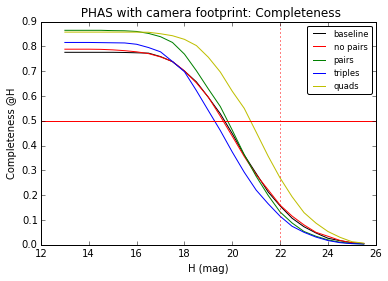

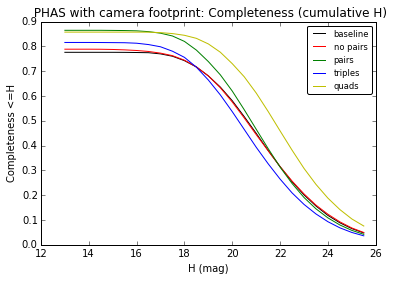

In [7]:
# Require 4 observations per night
nObsPerNight=4
completeList = []
intCompletenessList = []
for runName in runs:
    obsfile = runName+'_out.txt'
    mos = MoSlicer(orbitfile, Hrange=np.arange(13, 26, 0.5))
    mos.readObs(obsfile)
    metric = MoMetrics.DiscoveryChancesMetric(nObsPerNight=nObsPerNight)
    slicer = mos
    plotDict = {'label':labelDict[runName], 'color':colorDict[runName]}
    pandasConstraint = None
    discovery = mmb.MoMetricBundle(metric, slicer, pandasConstraint,
                                   runName=runName, metadata=metadata,
                                  plotDict=plotDict)

    bg = mmb.MoMetricBundleGroup({0:discovery}, outDir=outDir)
    bg.runAll()
    #bg.plotAll(closefigs=False)
    completeness = discovery.reduceMetric(discovery.metric.reduceFuncs['Completeness'])
    completeList.append(completeness)
    completenessInt = completeness.reduceMetric(completeness.metric.reduceFuncs['CumulativeH'])
    intCompletenessList.append(completenessInt)
ph = plots.PlotHandler(outDir=outDir)
ph.setMetricBundles(completeList)
ph.plot(plotFunc=moPlots.MetricVsH())
plt.axvline(22.0, color='r', linestyle=':')
plt.axhline(0.5, color='r', linestyle='-')

ph = plots.PlotHandler(outDir=outDir)
ph.setMetricBundles(intCompletenessList)
ph.plot(plotFunc=moPlots.MetricVsH())

Querying database with no constraint.
Found 2469307 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.
Querying database with no constraint.
Found 2557161 visits

/Users/yoachim/lsst/DarwinX86/anaconda/master-g68783b1848/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression '' should be explicitly declared as text('') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
Both binsize and bins have been set; Using binsize 1.000000 only.



Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.
Querying database with no constraint.
Found 2468320 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.
Querying database with no constraint.
Found 2444090 visits

Both binsize and bins have been set; Using binsize 1.000000 only.
Both binsize and bins have been set; Using binsize 1.000000 only.



Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.
Querying database with no constraint.
Found 2427591 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.


Both binsize and bins have been set; Using binsize 1.000000 only.


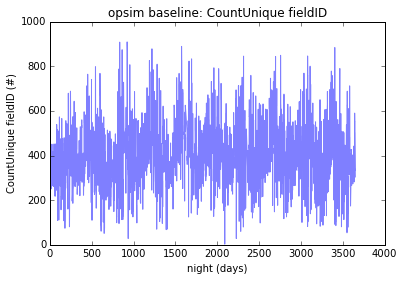

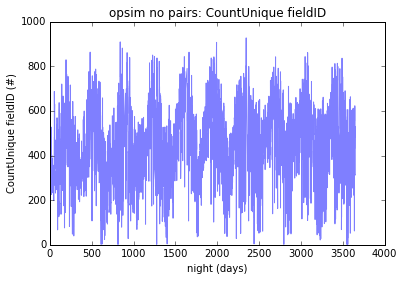

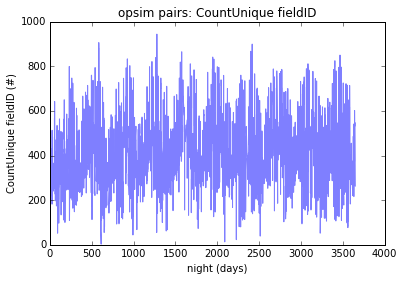

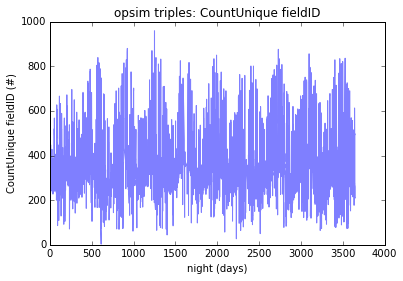

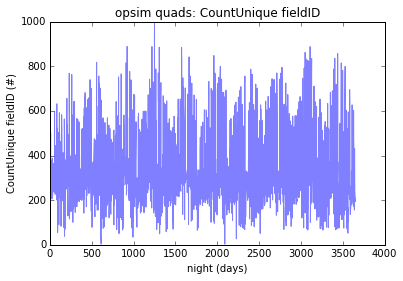

In [8]:
# Look at how many unique fields are observed each night
bundleList = []
slicer = slicers.OneDSlicer(sliceColName='night', binsize=1)
sql=''
resultsDb = db.ResultsDb(outDir=outDir)

for runName in runs:
    metadata=labelDict[runName]
    opsdb = db.OpsimDatabase('/Users/yoachim/Scratch/Opsim_sqlites/'+runName+'_sqlite.db')
    metric = metrics.CountUniqueMetric(col='fieldID')
    summaryStats = [metrics.MedianMetric()]
    bundle = metricBundles.MetricBundle(metric,slicer,sql, summaryMetrics=summaryStats,
                                       metadata=metadata)
    bundleList.append(bundle)
    group = metricBundles.MetricBundleGroup({0:bundle}, opsdb,
                                            outDir=outDir, resultsDb=resultsDb)
    group.runAll()
    group.plotAll(closefigs=False)

In [9]:
print 'run, median number of unique fields per night'
for bund,run in zip(bundleList,runs):
    print labelDict[run], bund.summaryValues['Median']

run, median number of unique fields per night
baseline 388.0
no pairs 465.0
pairs 393.0
triples 325.0
quads 283.0


/Users/yoachim/lsst/DarwinX86/anaconda/master-g68783b1848/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression 'filter = "g" or filter="r...' should be explicitly declared as text('filter = "g" or filter="r...') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})


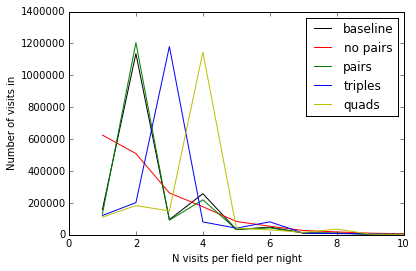

In [10]:
# Find the number of singles, pairs, tripples, etc
sqliteDir = '/Users/yoachim/Scratch/Opsim_sqlites/'
sql = 'filter = "g" or filter="r" or filter="i" or filter="z"'

for run in runs:
    opsdb = db.OpsimDatabase(sqliteDir + run + '_sqlite.db')
    fields = opsdb.fetchFieldsFromFieldTable()
    data = opsdb.fetchMetricData(['night','fieldID'], sql)
    nightBins = np.arange(data['night'].min(), data['night'].max() +2) -0.5
    fIDBins = np.arange(data['fieldID'].min(), data['fieldID'].max() +2) -0.5
    H,xe,ye = np.histogram2d(data['night'], data['fieldID'], bins=[nightBins,fIDBins])
    bins = np.arange(0.5, H.max()+2)
    finalHist, finalBins = np.histogram(H.ravel(), bins)
    x = np.arange(1,finalHist.size+1)
    plt.plot(x, finalHist*x, color=colorDict[run], label=labelDict[run])
plt.xlim([0,10])
plt.ylabel('Number of visits in')
plt.xlabel('N visits per field per night')
plt.legend()
    